In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

In [2]:
import pandas as pd # Data-Frame Handling

Data = pd.read_csv("./Data/train.csv")
Data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [4]:
#(Data["Survived"] == 1).sum()

In [5]:
# Find the Base-Truth 

base_truth = Data['Survived'].mean()
other_truth = 1-base_truth
print (base_truth, other_truth)

ground_truth = max(base_truth, other_truth)
print(ground_truth)

0.383838383838 0.616161616162
0.616161616162


In [6]:
Corr_mat = Data.corr()
print (Corr_mat)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.036847 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.077221 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.369226  0.083081  0.018443   
Age             0.036847 -0.077221 -0.369226  1.000000 -0.308247 -0.189119   
SibSp          -0.057527 -0.035322  0.083081 -0.308247  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.189119  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096067  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096067  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


In [7]:
Corr_mat["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

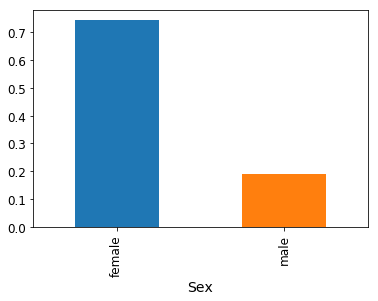

In [8]:
## 성별 only

Class_Sex = Data.groupby('Sex').mean()
Class_Sex
Class_Sex['Survived'].plot.bar()

In [9]:
Data.groupby('Pclass').mean()

# See the Correlation Matrix "pclass" vs "fare"
# Why Correlation between "pclass" and "fare" has (large) negative value?

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [10]:
Class_sex_pclass= Data.groupby(['Pclass','Sex']).mean()
Class_sex_pclass

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1      female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2      female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3      female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1      female  106.125798  
       male     67.226127  
2      female   21.970121  
       male     19.741782  
3      female   16.118810  
       male     12.661633

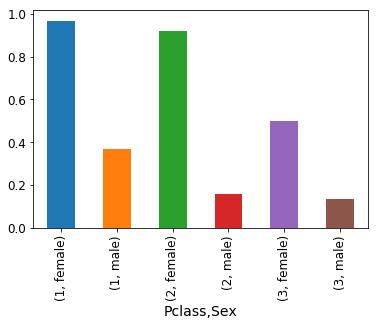

In [11]:
Class_sex_pclass['Survived'].plot.bar()

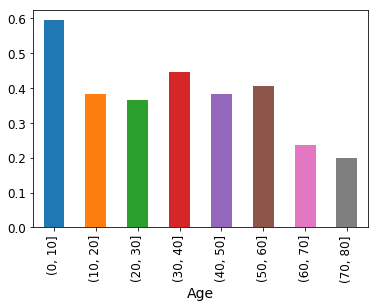

In [12]:
Group_by_age = pd.cut(Data["Age"], np.arange(0,90,10))
Class_age = Data.groupby(Group_by_age).mean()
#Class_age
Class_age['Survived'].plot.bar()

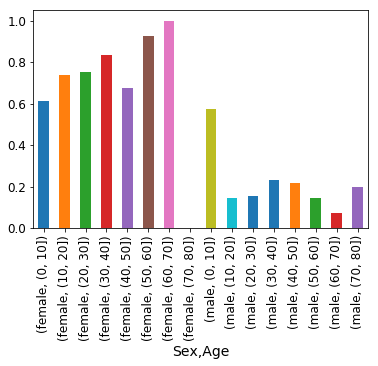

In [13]:
Class_Age_Pclass = Data.groupby(["Sex",Group_by_age]).mean()
Class_Age_Pclass['Survived'].plot.bar()

In [14]:
Data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

In [15]:
## Cabin Preprocessing -> Cabin_bool = Null = 0, Other = 1 

Data.loc[Data["Cabin"].str.contains('.',regex=True,na=False),"Cabin_Bin"] = 1
Data["Cabin_Bin"].fillna(0, inplace=True)

Data = Data.drop(["Cabin"],axis=1)

In [16]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


In [17]:
Data = Data.dropna()

In [18]:
Data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Cabin_Bin
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1.0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1.0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0.0


In [19]:
## Parch > 0 and Age < 10

Data.loc[(Data["Parch"]>0) & (Data["Age"]<15),"Child_with_Parent"] = 1
Data["Child_with_Parent"].fillna(0, inplace=True)
#Data.head()
Data["Child_with_Parent"].sum()/len(Data)

0.098314606741573038

In [20]:
#from sklearn import preprocessing

#processed_df = Data.copy()
#processed_df = processed_df.drop(['Name','Ticket','PassengerId','Sex','Embarked'],axis=1)

In [21]:
from sklearn import preprocessing

processed_df = Data.copy()
le = preprocessing.LabelEncoder()
processed_df.Sex = le.fit_transform(processed_df.Sex)
processed_df.Embarked = le.fit_transform(processed_df.Embarked)
processed_df.Cabin_Bin = le.fit_transform(processed_df.Cabin_Bin)
processed_df.Child_with_Parent = le.fit_transform(processed_df.Child_with_Parent)

processed_df = processed_df.drop(['Name','Ticket','PassengerId'],axis=1)

In [22]:
processed_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Cabin_Bin,Child_with_Parent
0,0,3,1,22.0,1,0,7.2500,2,0,0
1,1,1,0,38.0,1,0,71.2833,0,1,0
2,1,3,0,26.0,0,0,7.9250,2,0,0
3,1,1,0,35.0,1,0,53.1000,2,1,0
4,0,3,1,35.0,0,0,8.0500,2,0,0


In [23]:
Corr_mat = processed_df.corr()
#Corr_mat
#print(Corr_mat["Survived"].sort_values(ascending=False))
print (Corr_mat)

                   Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived           1.000000 -0.356462 -0.536762 -0.082446 -0.015523  0.095265   
Pclass            -0.356462  1.000000  0.150826 -0.365902  0.065187  0.023666   
Sex               -0.536762  0.150826  1.000000  0.099037 -0.106296 -0.249543   
Age               -0.082446 -0.365902  0.099037  1.000000 -0.307351 -0.187896   
SibSp             -0.015523  0.065187 -0.106296 -0.307351  1.000000  0.383338   
Parch              0.095265  0.023666 -0.249543 -0.187896  0.383338  1.000000   
Fare               0.266100 -0.552893 -0.182457  0.093143  0.139860  0.206624   
Embarked          -0.181979  0.244145  0.109639 -0.032565  0.033064  0.011803   
Cabin_Bin          0.320733 -0.737721 -0.143177  0.244981 -0.031345  0.029509   
Child_with_Parent  0.112312  0.142081 -0.073898 -0.559824  0.517434  0.401871   

                       Fare  Embarked  Cabin_Bin  Child_with_Parent  
Survived           0.266100 -0.181979 

In [24]:
from sklearn import cross_validation

X = processed_df.drop(['Survived'],axis=1).values
y = processed_df['Survived'].values

X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

/usr/local/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

logit_reg = LogisticRegression()
logit_reg

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [26]:
from sklearn.model_selection import GridSearchCV

param_grid = [
    {'penalty': ["l1","l2"], 'C':[0.5,1.0,2.0,999.]} 
    # Inverse of regularization Strength -> 1/C
    ]

logit_reg = LogisticRegression()
grid_search = GridSearchCV(logit_reg, param_grid, cv=5,
                          scoring="accuracy")
# See the, http://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid=[{'penalty': ['l1', 'l2'], 'C': [0.5, 1.0, 2.0, 999.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=0)

In [27]:
grid_search.best_params_

{'C': 999.0, 'penalty': 'l1'}

In [28]:
grid_search.best_estimator_

LogisticRegression(C=999.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [29]:
cvres = grid_search.cv_results_
#cvres

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

0.787346221441 {'C': 0.5, 'penalty': 'l1'}
0.783831282953 {'C': 0.5, 'penalty': 'l2'}
0.796133567663 {'C': 1.0, 'penalty': 'l1'}
0.787346221441 {'C': 1.0, 'penalty': 'l2'}
0.792618629174 {'C': 2.0, 'penalty': 'l1'}
0.796133567663 {'C': 2.0, 'penalty': 'l2'}
0.797891036907 {'C': 999.0, 'penalty': 'l1'}
0.797891036907 {'C': 999.0, 'penalty': 'l2'}


In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

svm_clf_pipe = Pipeline([
            ("scaler", StandardScaler()),
            ("svm_clf", SVC())
])

param_grid = [
        {'svm_clf__kernel': ['linear'], 'svm_clf__C': [10., 100., 1000.,10000.]},
        {'svm_clf__kernel': ['rbf'], 'svm_clf__C': [1.0,10.,100.,1000.0],
         'svm_clf__gamma': [0.01,0.1,1.0,]},
    ]

grid_search = GridSearchCV(svm_clf_pipe, param_grid, cv=5,
                          scoring="accuracy")

grid_search.fit(X_train,y_train)

cvres = grid_search.cv_results_

for acc, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(acc, params)

0.789103690685 {'svm_clf__C': 10.0, 'svm_clf__kernel': 'linear'}
0.789103690685 {'svm_clf__C': 100.0, 'svm_clf__kernel': 'linear'}
0.787346221441 {'svm_clf__C': 1000.0, 'svm_clf__kernel': 'linear'}
0.789103690685 {'svm_clf__C': 10000.0, 'svm_clf__kernel': 'linear'}
0.789103690685 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.804920913884 {'svm_clf__C': 1.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.773286467487 {'svm_clf__C': 1.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.824253075571 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.797891036907 {'svm_clf__C': 10.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.760984182777 {'svm_clf__C': 10.0, 'svm_clf__gamma': 1.0, 'svm_clf__kernel': 'rbf'}
0.808435852373 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.01, 'svm_clf__kernel': 'rbf'}
0.801405975395 {'svm_clf__C': 100.0, 'svm_clf__gamma': 0.1, 'svm_clf__kernel': 'rbf'}
0.732864674868 {'svm_clf__C': 100.0, 'svm_clf__gamma

In [34]:
result_matric = pd.DataFrame(grid_search.cv_results_)
result_matric

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_svm_clf__C,param_svm_clf__gamma,param_svm_clf__kernel,params,rank_test_score,split0_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.017174,0.000814,0.789104,0.797019,10,NaN,linear,"{'svm_clf__C': 10.0, 'svm_clf__kernel': 'linear'}",7,0.798246,...,0.842105,0.800000,0.771930,0.791209,0.805310,0.782895,0.007035,0.000176,0.037910,0.009028
1,0.086463,0.000684,0.789104,0.797019,100,NaN,linear,"{'svm_clf__C': 100.0, 'svm_clf__kernel': 'line...",7,0.798246,...,0.842105,0.800000,0.771930,0.791209,0.805310,0.782895,0.031866,0.000032,0.037910,0.009028
2,11.860691,0.000655,0.787346,0.797019,1000,NaN,linear,"{'svm_clf__C': 1000.0, 'svm_clf__kernel': 'lin...",11,0.789474,...,0.842105,0.800000,0.771930,0.791209,0.805310,0.782895,8.370715,0.000028,0.037648,0.009028
3,45.719812,0.000804,0.789104,0.796579,10000,NaN,linear,"{'svm_clf__C': 10000.0, 'svm_clf__kernel': 'li...",7,0.798246,...,0.842105,0.800000,0.771930,0.791209,0.805310,0.782895,12.990033,0.000221,0.037910,0.008481
4,0.004809,0.000978,0.789104,0.790424,1,0.01,rbf,"{'svm_clf__C': 1.0, 'svm_clf__gamma': 0.01, 's...",7,0.798246,...,0.842105,0.778022,0.771930,0.791209,0.805310,0.785088,0.000373,0.000134,0.037910,0.008347
5,0.004676,0.000815,0.804921,0.840510,1,0.1,rbf,"{'svm_clf__C': 1.0, 'svm_clf__gamma': 0.1, 'sv...",3,0.754386,...,0.824561,0.843956,0.815789,0.841758,0.840708,0.839912,0.000482,0.000030,0.030245,0.004064
6,0.006459,0.001170,0.773286,0.891039,1,1,rbf,"{'svm_clf__C': 1.0, 'svm_clf__gamma': 1.0, 'sv...",12,0.754386,...,0.789474,0.892308,0.728070,0.892308,0.823009,0.885965,0.000641,0.000077,0.032016,0.002537
7,0.005546,0.000835,0.824253,0.824254,10,0.01,rbf,"{'svm_clf__C': 10.0, 'svm_clf__gamma': 0.01, '...",1,0.824561,...,0.842105,0.821978,0.815789,0.828571,0.840708,0.822368,0.000590,0.000071,0.016356,0.002340
8,0.009119,0.001183,0.797891,0.873025,10,0.1,rbf,"{'svm_clf__C': 10.0, 'svm_clf__gamma': 0.1, 's...",6,0.763158,...,0.815789,0.868132,0.807018,0.872527,0.796460,0.868421,0.001739,0.000376,0.018430,0.006537
9,0.012212,0.001336,0.760984,0.911692,10,1,rbf,"{'svm_clf__C': 10.0, 'svm_clf__gamma': 1.0, 's...",14,0.745614,...,0.780702,0.909890,0.710526,0.912088,0.814159,0.901316,0.002794,0.000364,0.034722,0.006359
